In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt



In [14]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [20]:
#dropping unnecessary columns
data = data.drop("name", axis=1)

# Check for missing values
print(data.isnull().sum())


year             0
selling_price    0
km_driven        0
fuel             0
owner            0
dtype: int64


In [19]:
#data cleaning
# Fill only numeric columns with their median
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Now check for any missing values
print(data.isnull().sum())


name             0
year             0
selling_price    0
km_driven        0
fuel             0
owner            0
dtype: int64


In [38]:
categorical_cols = ["fuel", "seller_type", "transmission", "owner"]
numerical_cols = ["year", "km_driven"]


Training

In [39]:

# Assuming 'data' still has 'year', 'km_driven', 'fuel', 'owner'
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features and target
X = data_encoded.drop("selling_price", axis=1)
y = data_encoded["selling_price"]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f'R² Score: {r2}')
print(f'MSE:{mse}')

R² Score: 0.22467168677445792
MSE:236607163156.4936


Visual Plot of linear regression


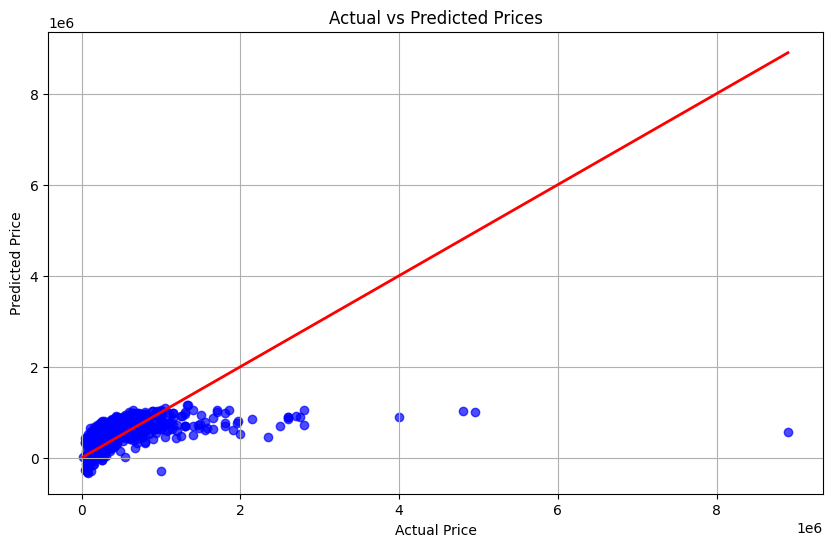

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()


RESIDUAL PLOT


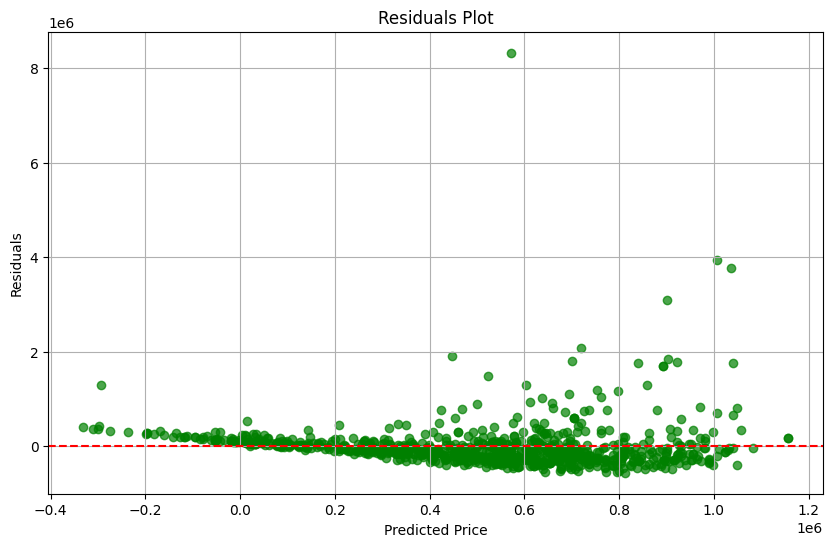

In [32]:
# Residual plot
plt.figure(figsize=(10,6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='g')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Study Hours
y = np.array([50, 55, 65, 70, 75])           # Exam Scores

# Model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])



Intercept (β0): 43.5
Slope (β1): 6.500000000000001


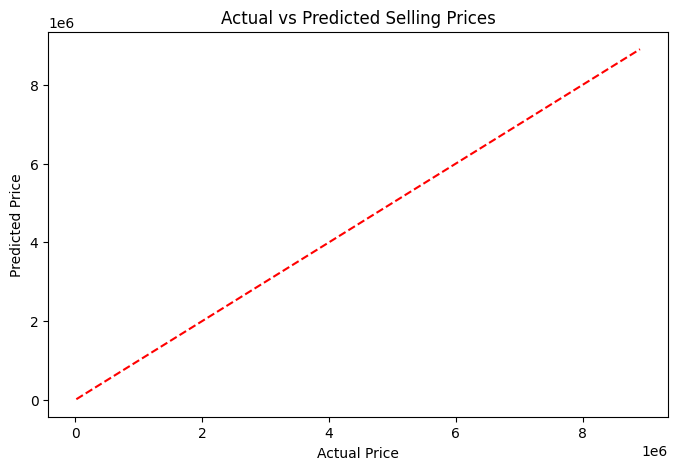

In [ ]:
import seaborn as sns
# Visualization : Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(X=y_test, Y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Selling Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()